# Predicting shots made per game by Kobe Bryant

In this lab you'll be using regularization techniques Ridge, Lasso, and Elastic Net to try and predict well how many shots Kobe Bryant made per game in his career.

---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/kobe_bryant/kobe_superwide_games.csv')

---

### 2. Examine the data

- How many columns are there?
- Infer what the observations (rows) and columns represent.
- Why is this data that regularization might be particularly useful for?

In [6]:
print kobe.shape
print kobe.columns
kobe.sort_values('CAREER_GAME_NUMBER',ascending=0).head(15)

(1558, 645)
Index([u'SHOTS_MADE', u'AWAY_GAME', u'SEASON_OPPONENT:atl:1996-97',
       u'SEASON_OPPONENT:atl:1997-98', u'SEASON_OPPONENT:atl:1999-00',
       u'SEASON_OPPONENT:atl:2000-01', u'SEASON_OPPONENT:atl:2001-02',
       u'SEASON_OPPONENT:atl:2002-03', u'SEASON_OPPONENT:atl:2003-04',
       u'SEASON_OPPONENT:atl:2004-05',
       ...
       u'ACTION_TYPE:tip_layup_shot', u'ACTION_TYPE:tip_shot',
       u'ACTION_TYPE:turnaround_bank_shot',
       u'ACTION_TYPE:turnaround_fadeaway_bank_jump_shot',
       u'ACTION_TYPE:turnaround_fadeaway_shot',
       u'ACTION_TYPE:turnaround_finger_roll_shot',
       u'ACTION_TYPE:turnaround_hook_shot',
       u'ACTION_TYPE:turnaround_jump_shot', u'SEASON_GAME_NUMBER',
       u'CAREER_GAME_NUMBER'],
      dtype='object', length=645)


,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
1557,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.000000,0.040000,66,1559
1556,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.000000,65,1558
1555,9.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.0,0.045455,0.045455,64,1557
1554,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,63,1556
1553,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.105263,0.0,0.000000,0.052632,62,1555
1552,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.083333,0.0,0.000000,0.083333,61,1554
1551,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.107143,0.0,0.035714,0.000000,60,1553
1550,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,59,1552
1549,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.181818,0.0,0.000000,0.000000,58,1551
1548,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.066667,0.0,0.000000,0.000000,57,1550


---

### Make predictor and target variables. Normalize the predictors.

Why is normalization necessary for regularized regressions?

There is a class in sklearn.preprocessing called `StandardScaler`. Look it up and figure out how to use it to normalize your predictor matrix. 

In [7]:
cols = [k for k in kobe.columns]
cols

['SHOTS_MADE',
 'AWAY_GAME',
 'SEASON_OPPONENT:atl:1996-97',
 'SEASON_OPPONENT:atl:1997-98',
 'SEASON_OPPONENT:atl:1999-00',
 'SEASON_OPPONENT:atl:2000-01',
 'SEASON_OPPONENT:atl:2001-02',
 'SEASON_OPPONENT:atl:2002-03',
 'SEASON_OPPONENT:atl:2003-04',
 'SEASON_OPPONENT:atl:2004-05',
 'SEASON_OPPONENT:atl:2005-06',
 'SEASON_OPPONENT:atl:2006-07',
 'SEASON_OPPONENT:atl:2007-08',
 'SEASON_OPPONENT:atl:2008-09',
 'SEASON_OPPONENT:atl:2009-10',
 'SEASON_OPPONENT:atl:2010-11',
 'SEASON_OPPONENT:atl:2011-12',
 'SEASON_OPPONENT:atl:2012-13',
 'SEASON_OPPONENT:atl:2013-14',
 'SEASON_OPPONENT:atl:2014-15',
 'SEASON_OPPONENT:atl:2015-16',
 'SEASON_OPPONENT:bkn:2012-13',
 'SEASON_OPPONENT:bkn:2015-16',
 'SEASON_OPPONENT:bos:1996-97',
 'SEASON_OPPONENT:bos:1997-98',
 'SEASON_OPPONENT:bos:1999-00',
 'SEASON_OPPONENT:bos:2001-02',
 'SEASON_OPPONENT:bos:2002-03',
 'SEASON_OPPONENT:bos:2003-04',
 'SEASON_OPPONENT:bos:2004-05',
 'SEASON_OPPONENT:bos:2005-06',
 'SEASON_OPPONENT:bos:2006-07',
 'SEASON_OP

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

y = kobe['SHOTS_MADE'].values
x = kobe.iloc[:,1:]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x) 


---

### Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of a linear regression model with 10 cross-validation folds.

How does it perform?

In [20]:
lm = LinearRegression()
scores = cross_val_score(lm, scaled_data, y, cv=10)

print 'R^2: ', scores
print'R^2 mean: ', np.mean(scores)

R^2:  [ -6.38038134e+28  -4.03533830e+27  -1.06501206e+28  -5.12016159e+27
  -2.44261119e+28  -1.45431869e+28  -2.64683546e+27  -1.36574776e+28
  -1.25350825e+28  -3.30557645e+28]
R^2 mean:  -1.84473892846e+28


---

### Find an optimal value for Ridge regression alpha using RidgeCV

[Go to the documentation and read how RidgeCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

Hint: once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`).


In [36]:
alphas = np.logspace(0,5,200)
optimal_ridge = RidgeCV(alphas=alphas, cv=10)

optimal_ridge.fit(scaled_data, y)

print optimal_ridge.alpha_

775.259748863


---

### Cross-validate the Ridge $R^2$ with the optimal alpha.

Is it better than the Linear regression? If so, why would this be?

In [37]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, scaled_data, y, cv=10)

print 'R^2: ',ridge_scores
print 'R^2 mean: ',np.mean(ridge_scores)

R^2:  [ 0.5822626   0.52880462  0.4869004   0.59583817  0.52396335  0.52942952
  0.52842192  0.41153448  0.39857643  0.44489752]
R^2 mean:  0.503062899682


---

### Find an optimal value for Lasso regression alpha using LassoCV

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) It is very similar to RidgeCV.

Hint: again, once the LassoCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.

Recall that Lasso, unlike Ridge, performs best searching alphas through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over.

In [23]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(scaled_data, y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0679053997933


---

### Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? For each, why would this be?

Depending on which $R^2$ is better between the Ridge and Lasso, what can you infer about the primary issue in the data?

In [25]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, scaled_data, y, cv=10)

print 'R^2: ',lasso_scores
print 'R^2 mean: ',np.mean(lasso_scores)

R^2:  [ 0.61603625  0.52641159  0.53888743  0.61322432  0.54627539  0.5554072
  0.52716822  0.44849563  0.4646267   0.51838952]
R^2 mean:  0.535492226208


---

### Look at the coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots kobe made in a game?

Note: if you only fit the Lasso within cross_val_score, you will have to refit it outside of that
function to pull out the coefficients.

In [26]:
lasso.fit(scaled_data, y)
lasso_coefs = pd.DataFrame({'variable':x.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
579,1.233880,1.233880,COMBINED_SHOT_TYPE:jump_shot
574,0.866201,0.866201,SHOT_TYPE:2pt_field_goal
566,0.453050,0.453050,SHOT_ZONE_BASIC:restricted_area
577,0.274926,0.274926,COMBINED_SHOT_TYPE:dunk
611,0.272130,-0.272130,ACTION_TYPE:jump_shot
575,0.140492,0.140492,SHOT_TYPE:3pt_field_goal
582,0.132360,0.132360,SECONDS_REMAINING
612,0.129658,-0.129658,ACTION_TYPE:layup_shot
423,0.127065,0.127065,SEASON_OPPONENT:sac:1999-00
561,0.118469,0.118469,SHOT_ZONE_BASIC:above_the_break_3


In [28]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(x.shape[0])

Percent variables zeroed out: 0.326059050064


---

### Find an optimal value for Elastic Net regression alpha using ElasticNetCV

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:

    alpha: strength of regularization
    l1_ratio: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for l1_ratio: it will not allow it and break!

You can use n_alphas for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [33]:
l1_ratios = np.linspace(0.01, 1.0, 5)

optimal_elast = ElasticNetCV(n_alphas=500, cv=10, l1_ratio=.5)
#optimal_elast = ElasticNetCV(n_alphas=500, cv=10, l1_ratio=l1_ratios)
optimal_elast.fit(scaled_data, y)

print optimal_elast.alpha_
print optimal_elast.l1_ratio_



0.121573274344
0.5


---

### Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the other regularized regressions?

In [35]:
elast = ElasticNet(alpha=optimal_elast.alpha_, l1_ratio=optimal_elast.l1_ratio_)

elast_scores = cross_val_score(elast, scaled_data, y, cv=10)


print 'R^2: ',elast_scores
print 'R^2 mean: ',np.mean(elast_scores)

R^2:  [ 0.6164586   0.52900111  0.53213103  0.6140734   0.54466457  0.55417713
  0.52688646  0.44367386  0.46038737  0.50238485]
R^2 mean:  0.532383839803


---

### Plot the residuals for the ridge, lasso, and elastic net on histograms

This is another way to look at the performance of your model.

The tighter the distribution of residuals around zero, the better your model has performed!

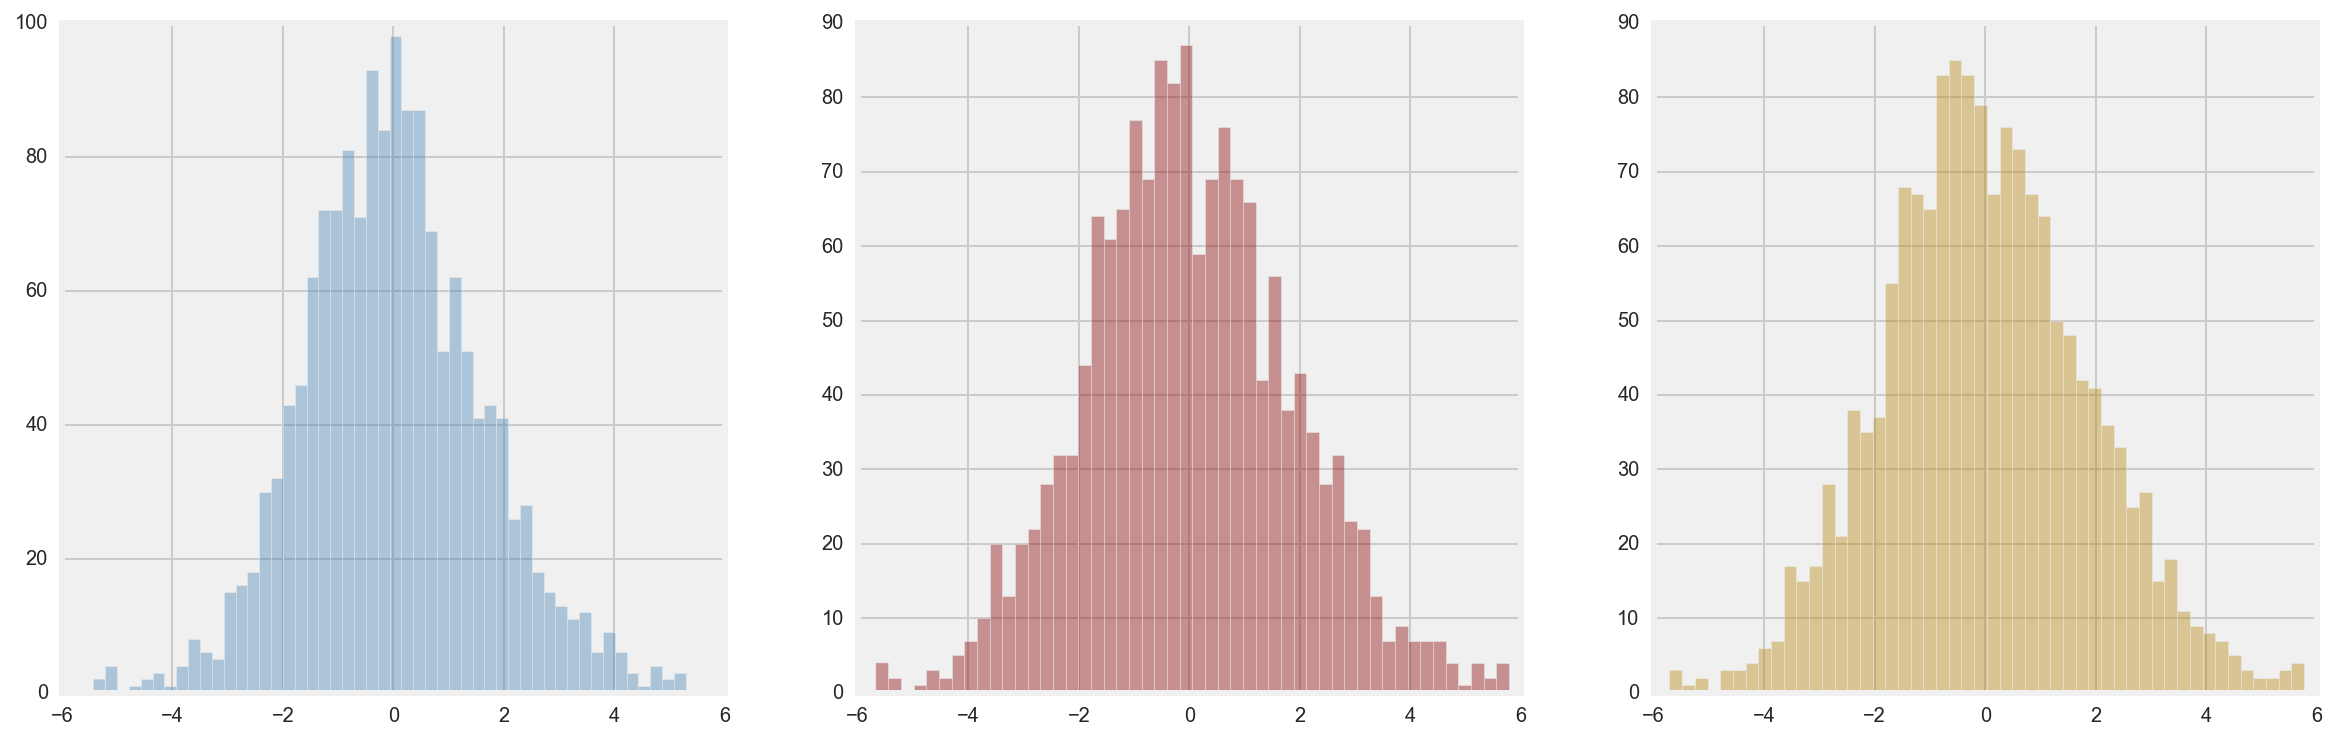

In [39]:
ridge.fit(scaled_data, y)
elast.fit(scaled_data, y)
lasso.fit(scaled_data, y)

ridge_resid = y - ridge.predict(scaled_data)
lasso_resid = y - lasso.predict(scaled_data)
elast_resid = y - elast.predict(scaled_data)

fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(elast_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()
